In [23]:
import torch


path_prefix = "../../experiments_full_11_09_2025"

dataset_names = [
    "picnn_fnlvqr_glasses",
    "picnn_fnlvqr_star",
    "picnn_fnlvqr_banana",
    "fnlvqr_glasses",
    "fnlvqr_star",
    "fnlvqr_banana",
    "funnel_1",
    "funnel_2",
    "funnel_4",
    "funnel_6",
    "funnel_8",
    "funnel_10",
    "funnel_12",
    "funnel_14",
    "funnel_16"
]

metric_names = [
    "Y_wasserstein2",
    "Y_sliced_wasserstein2",
    "Y_kde_kl_divergence",
    "Y_kde_l1_divergence",
    "U_wasserstein2",
    "U_sliced_wasserstein2",
    "U_kde_kl_divergence",
    "U_kde_l1_divergence",

    "Y|X_wasserstein2",
    "Y|X_sliced_wasserstein2",
    "Y|X_kde_kl_divergence",
    "Y|X_kde_l1_divergence",
    "U|X_wasserstein2",
    "U|X_sliced_wasserstein2",
    "U|X_kde_kl_divergence",
    "U|X_kde_l1_divergence",

    "YX_wasserstein2",
    "YX_sliced_wasserstein2",
    "YX_kde_kl_divergence",
    "YX_kde_l1_divergence",
    "UX_wasserstein2",
    "UX_sliced_wasserstein2",
    "UX_kde_kl_divergence",
    "UX_kde_l1_divergence",

    "Q^(-1)(Y,X)_uv_l2",
    "Q(U,X)_uv_l2",
]

dataset_name_to_pretty_name = {
    "picnn_fnlvqr_glasses":"Convex Glasses",
    "picnn_fnlvqr_star":"Convex Star",
    "picnn_fnlvqr_banana":"Convex Banana",
    "fnlvqr_glasses":"Glasses",
    "fnlvqr_star":"Star",
    "fnlvqr_banana":"Banana",
    "funnel_1":"Funnel Y - R1",
    "funnel_2":"Funnel Y - R2",
    "funnel_4":"Funnel Y - R4",
    "funnel_6":"Funnel Y - R6",
    "funnel_8":"Funnel Y - R8",
    "funnel_10":"Funnel Y - R10",
    "funnel_12":"Funnel Y - R12",
    "funnel_14":"Funnel Y - R14",
    "funnel_16":"Funnel Y - R16",
}

metric_name_to_pretty_name = {
    "Y_wasserstein2":"Wasserstein Y",
    "Y_sliced_wasserstein2":"Sliced Wasserstein Y",
    "Y_kde_kl_divergence":"Kernel Density Estimate KL Y",
    "Y_kde_l1_divergence":"Kernel Density Estimate KL L1",
    "U_wasserstein2":"Wasserstein U",
    "U_sliced_wasserstein2":"Sliced Wasserstein U",
    "U_kde_kl_divergence":"Kernel Density Estimate KL U",
    "U_kde_l1_divergence":"Kernel Density Estimate L1 U",

    "Y|X_wasserstein2":"Wasserstein Y|X",
    "Y|X_sliced_wasserstein2":"Sliced Wasserstein Y|X",
    "Y|X_kde_kl_divergence":"Kernel Density Estimate KL Y|X",
    "Y|X_kde_l1_divergence":"Kernel Density Estimate L1 Y|X",

    "U|X_wasserstein2":"Wasserstein U|X",
    "U|X_sliced_wasserstein2":"Sliced Wasserstein U|X",
    "U|X_kde_kl_divergence":"Kernel Density Estimate KL U|X",
    "U|X_kde_l1_divergence":"Kernel Density Estimate L1 U|X",


    "YX_wasserstein2":"Wasserstein YX",
    "YX_sliced_wasserstein2":"Sliced Wasserstein YX",
    "YX_kde_kl_divergence":"Kernel Density Estimate KL YX",
    "YX_kde_l1_divergence":"Kernel Density Estimate L1 YX",

    "UX_wasserstein2":"Wasserstein UX",
    "UX_sliced_wasserstein2":"Sliced Wasserstein UX",
    "UX_kde_kl_divergence":"Kernel Density Estimate KL UX",
    "UX_kde_l1_divergence":"Kernel Density Estimate L1 UX",

    "Q^(-1)(Y,X)_uv_l2":"Unexplained Variance of Q^(-1)(Y,X)",
    "Q(U,X)_uv_l2":"Unexplained Variance of Q(U,X)"
}


model_names = [
    "E-NQR",# "EntropicNeuralQuantileRegression",
    "C-NQR$_U$",# "NeuralQuantileRegressionU",
    "C-NQR$_Y$",# "NeuralQuantileRegressionY",
    "CA-NQR$_U$",# "AmortizedNeuralQuantileRegressionU",
    "CA-NQR$_Y$",# "AmortizedNeuralQuantileRegressionY",
    "CPF"# "ConvexPotentialFlow",
]

model_name_to_idx = {
    model_name:idx
    for idx, model_name  in enumerate(model_names)
}

model_name_to_folder_name = {
    "E-NQR":"entropic_neural_quantile_regression",
    "C-NQR$_U$":"neural_quantile_regression_u",
    "C-NQR$_Y$":"neural_quantile_regression_y",
    "CA-NQR$_U$":"amortized_neural_quantile_regression_u",
    "CA-NQR$_Y$":"amortized_neural_quantile_regression_y",
    "CPF":"convex_potential_flow",
}

dataset_name_to_metric_name_to_model_name_to_metric_mean = {
    "Y_wasserstein2":{},
    "Y_sliced_wasserstein2":{},
    "Y_kde_kl_divergence":{},
    "Y_kde_l1_divergence":{},
    "U_wasserstein2":{},
    "U_sliced_wasserstein2":{},
    "U_kde_kl_divergence":{},
    "U_kde_l1_divergence":{},

    "Y|X_wasserstein2":{},
    "Y|X_sliced_wasserstein2":{},
    "Y|X_kde_kl_divergence":{},
    "Y|X_kde_l1_divergence":{},
    "U|X_wasserstein2":{},
    "U|X_sliced_wasserstein2":{},
    "U|X_kde_kl_divergence":{},
    "U|X_kde_l1_divergence":{},

    "YX_wasserstein2":{},
    "YX_sliced_wasserstein2":{},
    "YX_kde_kl_divergence":{},
    "YX_kde_l1_divergence":{},
    "UX_wasserstein2":{},
    "UX_sliced_wasserstein2":{},
    "UX_kde_kl_divergence":{},
    "UX_kde_l1_divergence":{},

    "Q^(-1)(Y,X)_uv_l2":{},
    "Q(U,X)_uv_l2":{},
    "training_time":{}
}

dataset_name_to_model_name_to_metric_name_to_mean_and_std = {
    dataset_name:{
        model_name:{
            metric_name:{   
                "mean":None,
                "std":None,
                "samples":None,
            } for metric_name in metric_names
        } for model_name in model_names
    } for dataset_name in dataset_names
}

In [25]:
for dataset_name, model_name_to_metric_name_to_mean_and_std in dataset_name_to_model_name_to_metric_name_to_mean_and_std.items():
    for model_name, metric_name_to_mean_and_std in model_name_to_metric_name_to_mean_and_std.items():
        metric_dict = torch.load(f"{path_prefix}/{dataset_name}/{model_name_to_folder_name[model_name]}/metrics.pth")
        for metric_name in metric_name_to_mean_and_std.keys():
            try:
                metric_stack = metric_dict[metric_name]
                metric_tensor = torch.stack(metric_stack)
                metric_mean = metric_tensor.mean().item()
                metric_std = metric_tensor.std().item()
                
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["mean"] = metric_mean
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["std"] = metric_std
                dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name]["samples"] = metric_tensor
            except KeyError:
                print(f"Failed {dataset_name=} {model_name=} {metric_name=}, metric is not found")

Failed dataset_name='fnlvqr_glasses' model_name='E-NQR' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='E-NQR' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='C-NQR$_U$' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='C-NQR$_U$' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='C-NQR$_Y$' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='C-NQR$_Y$' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CA-NQR$_U$' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CA-NQR$_U$' metric_name='Q(U,X)_uv_l2', metric is not found
Failed dataset_name='fnlvqr_glasses' model_name='CA-NQR$_Y$' metric_name='Q^(-1)(Y,X)_uv_l2', metric is not found
Failed d

model_name='E-NQR', metric_name='Y_wasserstein2', mean=0.029401916914687413, std=0.028468419736417172
model_name='E-NQR', metric_name='Y_sliced_wasserstein2', mean=0.15716605938387423, std=0.06863065660827736
model_name='E-NQR', metric_name='Y_kde_kl_divergence', mean=0.0009660077829669568, std=0.0034802683254867356
model_name='E-NQR', metric_name='Y_kde_l1_divergence', mean=0.005623118401607953, std=0.001443123515340886
model_name='E-NQR', metric_name='U_wasserstein2', mean=0.006111381273290679, std=0.002290798689429133
model_name='E-NQR', metric_name='U_sliced_wasserstein2', mean=0.07689590725245046, std=0.014099585729530954
model_name='E-NQR', metric_name='U_kde_kl_divergence', mean=0.0006848057805684079, std=0.004210098831459987
model_name='E-NQR', metric_name='U_kde_l1_divergence', mean=0.0071023404977899555, std=0.0031207150829648126
model_name='E-NQR', metric_name='Y|X_wasserstein2', mean=4.260818946451773, std=1.2374691370586774
model_name='E-NQR', metric_name='Y|X_sliced_wasse

/var/folders/rt/72m8hlc54ms0bkqzq024nm480000gp/T/ipykernel_87786/3837538123.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i * ncols + (ncols - 1)].legend(markerscale=2, bbox_to_anchor=[1.01, 1.01], loc='upper left')


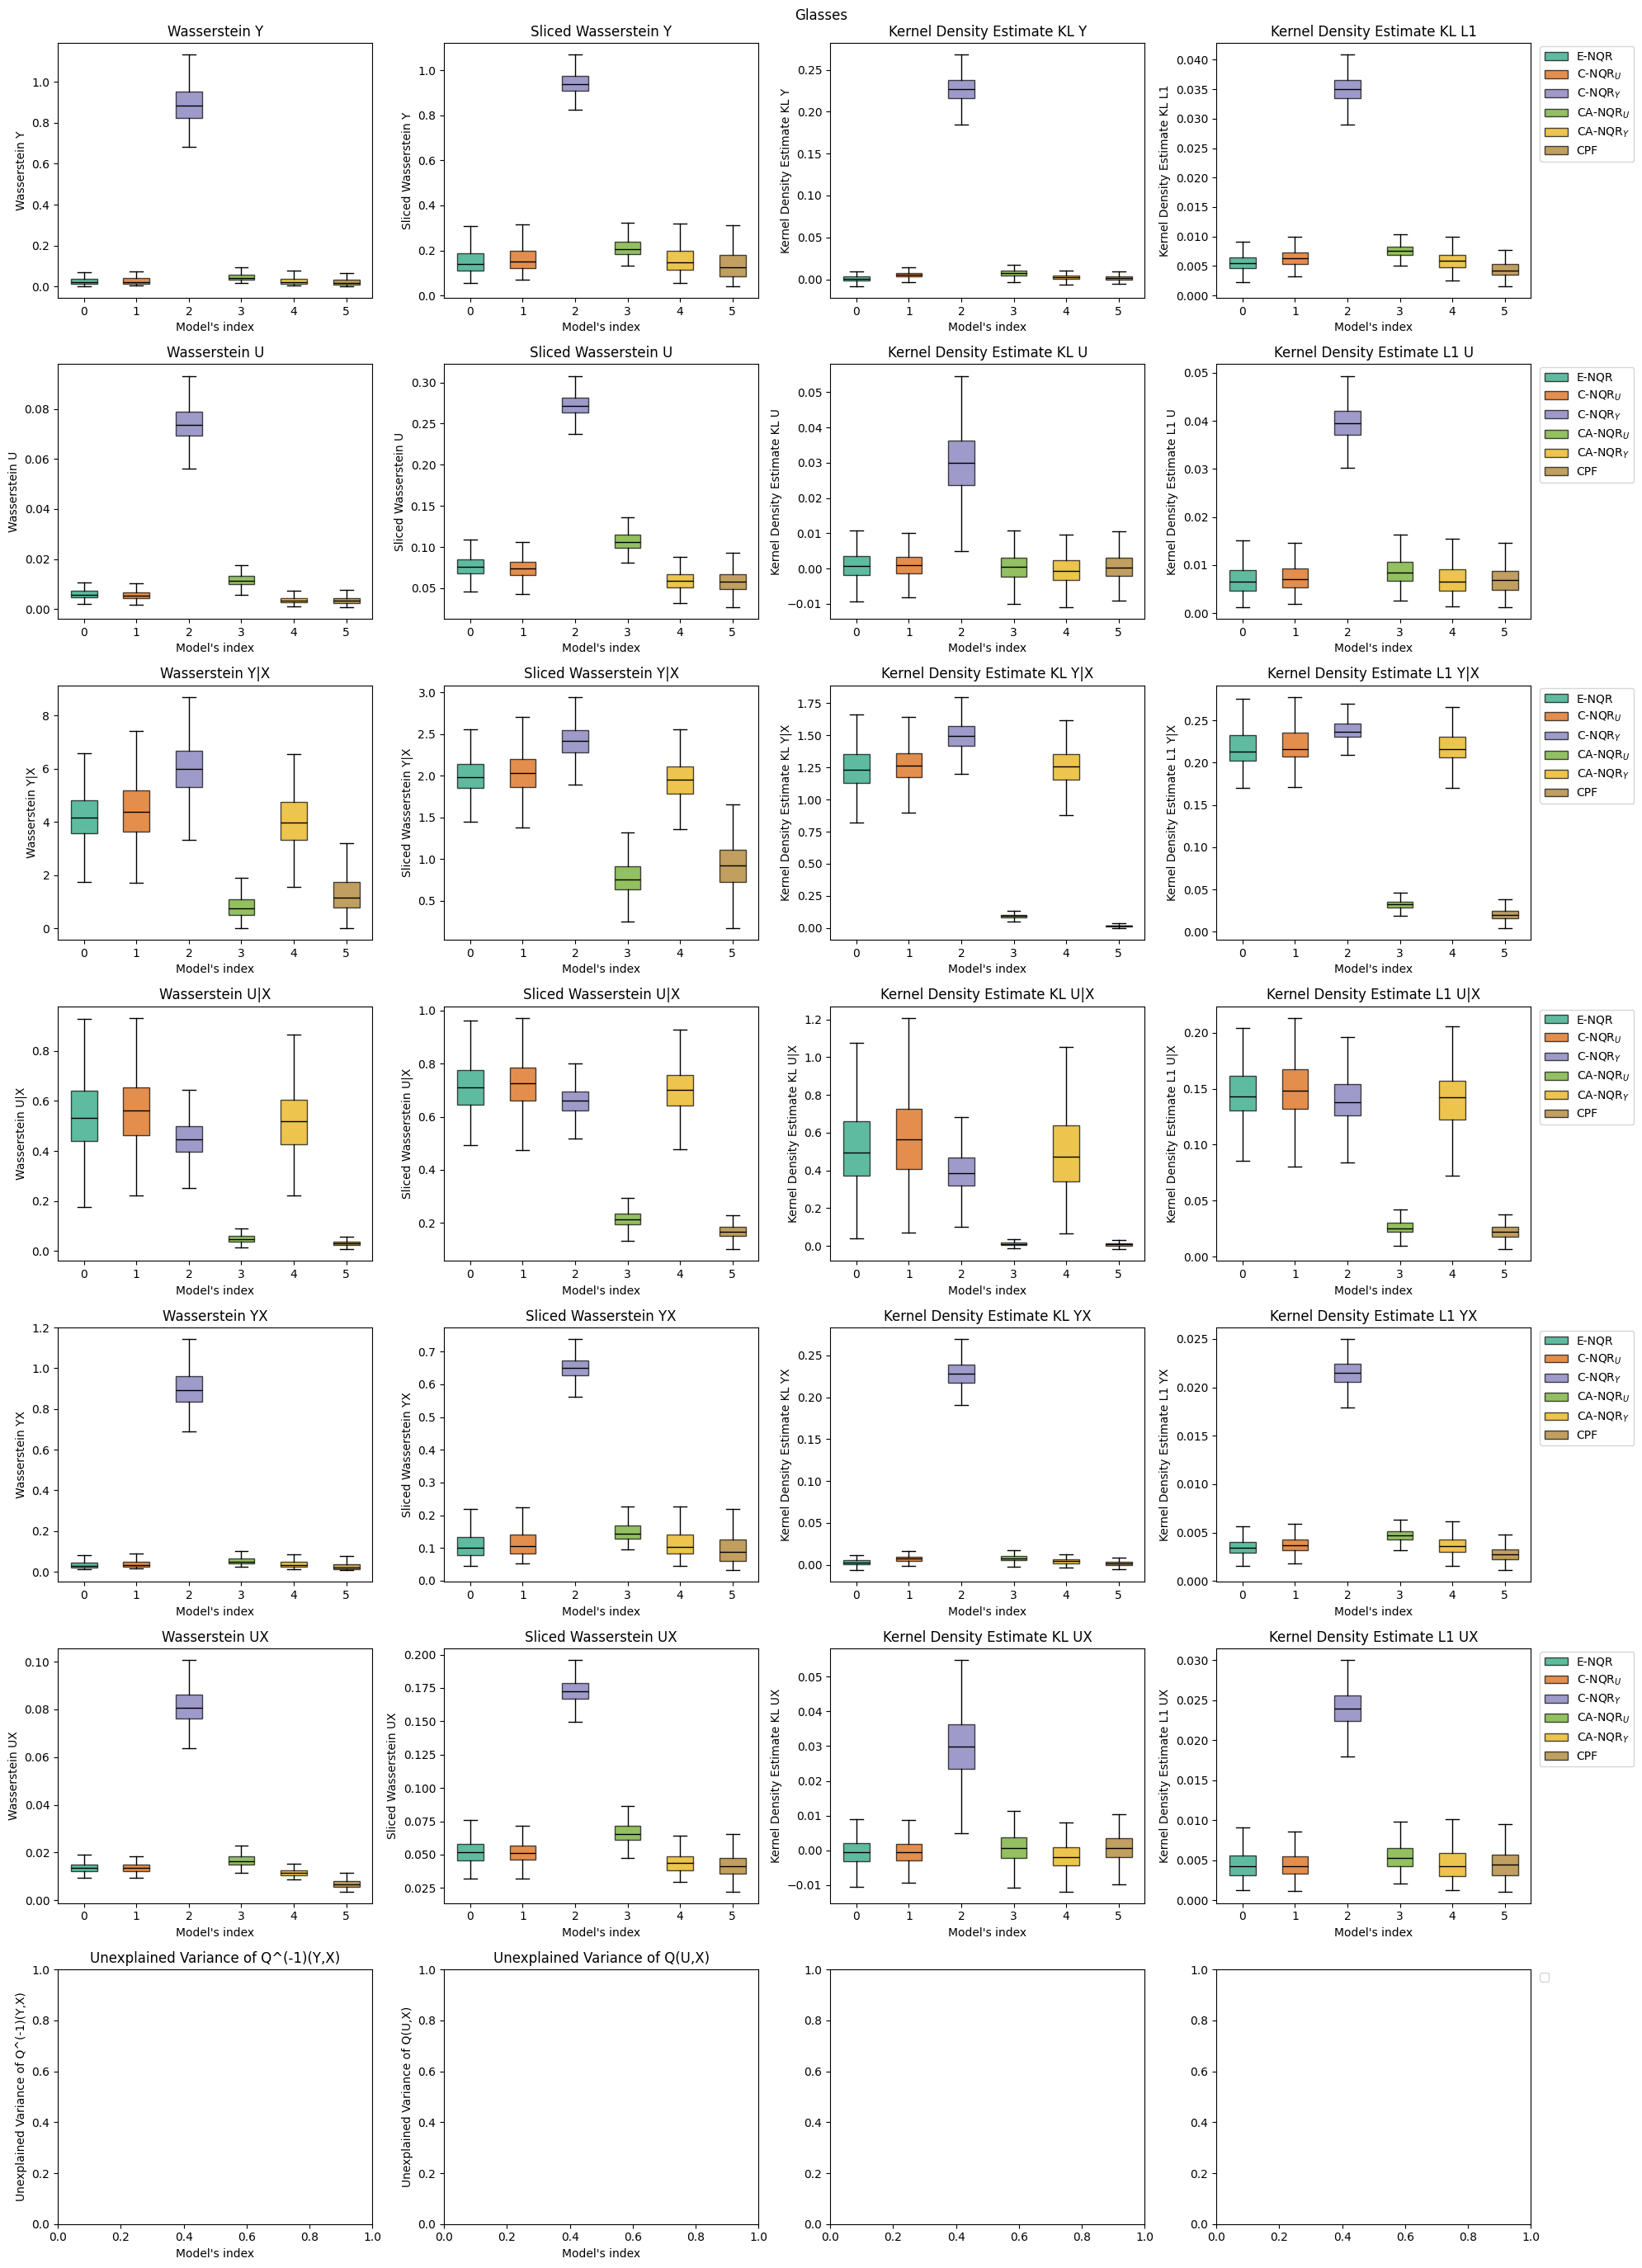

In [28]:
import matplotlib.pyplot as plt
import matplotlib
import math

dataset_name = 'fnlvqr_glasses'


colors = matplotlib.colormaps['Dark2']
model_name_to_metric_name_to_mean_and_std = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name]
number_of_metrics = len(metric_names)

ncols = 4
nrows = math.ceil(number_of_metrics / ncols)

fig, axs = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
fig.suptitle(dataset_name_to_pretty_name[dataset_name])

axs = axs.flatten()
metric_name_to_ax = {metric_name: ax for metric_name, ax in zip(metric_names, axs)}

for metric_name, ax in metric_name_to_ax.items():
    ax.set_title(metric_name_to_pretty_name[metric_name])
    ax.set_xlabel("Model's index")
    ax.set_ylabel(metric_name_to_pretty_name[metric_name])

for model_name, metric_name_to_mean_and_std in model_name_to_metric_name_to_mean_and_std.items():
    for metric_name, ax in metric_name_to_ax.items():
        mean, std, samples = metric_name_to_mean_and_std[metric_name].values()
        print(f"{model_name=}, {metric_name=}, {mean=}, {std=}")
        if mean is not None and std is not None:
            boxplot_color = colors(model_name_to_idx[model_name] / len(model_name_to_idx))
            ax.boxplot(
                samples,
                positions=[model_name_to_idx[model_name]],
                widths=0.5,
                patch_artist=True,
                boxprops=dict(facecolor=boxplot_color, alpha=0.7),
                medianprops=dict(color="black"),
                showfliers=False,
                whiskerprops=dict(color="black"),
                capprops=dict(color="black"),
                label=model_name
            )

for i in range(nrows):
    axs[i * ncols + (ncols - 1)].legend(markerscale=2, bbox_to_anchor=[1.01, 1.01], loc='upper left')

plt.tight_layout(rect=[0, 0, 1, 0.99]) 
plt.show()

In [15]:
metric_name_to_print = "Y|X_sliced_wasserstein2"

caption="Sliced wasserstein-2 distance"
label=None
metric_pretty = metric_name_to_pretty_name.get(metric_name_to_print, metric_name_to_print) if metric_name_to_pretty_name else metric_name_to_print
decimal_precision = 3
bold_k = 2


def latex_escape(s: str) -> str:
    """Very small LaTeX-escape helper for underscores and percent signs (common culprits)."""
    if not isinstance(s, str):
        return str(s)
    return s.replace('\\', r'\\').replace('_', r'\_').replace('%', r'\%')

n_models = len(model_names)
col_spec = "l" + "c" * n_models

metric_title = latex_escape(metric_pretty)

# Build rows
rows = []
for dataset_name in dataset_names:
    row_cells = [latex_escape(dataset_name_to_pretty_name.get(dataset_name, dataset_name))]
    means_for_ranking = []
    formatted_cells = []

    for model_name in model_names:
        metric_dict = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name_to_print]
        mean, std = metric_dict.get("mean"), metric_dict.get("std")

        if mean is None or std is None:
            formatted = "--"
            means_for_ranking.append(float("inf"))
        else:
            fmt = f"{mean:.{decimal_precision}f} \\pm {std:.{decimal_precision}f}"
            formatted = fmt
            means_for_ranking.append(mean)

        formatted_cells.append(formatted)

    smallest_indices = sorted(range(len(means_for_ranking)), key=lambda i: means_for_ranking[i])[:bold_k]

    for i, cell in enumerate(formatted_cells):
        if cell == "--":
            # keep as plain text (no math mode)
            wrapped = cell
        else:
            if i in smallest_indices and means_for_ranking[i] != float("inf"):
                # bold the entire math expression
                wrapped = f"$\\mathbf{{{cell}}}$"
            else:
                wrapped = f"${cell}$"
        formatted_cells[i] = wrapped

    # Escape model names in header separately later; here extend row cells with formatted entries
    row_cells.extend(formatted_cells)
    rows.append(" & ".join(row_cells) + " \\\\")

# Build full table
header_models = " & ".join(latex_escape(m) for m in model_names)

table_lines = []
table_lines.append("\\begin{table}[htbp]")
table_lines.append("\\centering")
if caption:
    table_lines.append(f"\\caption{{{latex_escape(caption)}}}")
table_lines.append("\\resizebox{\\textwidth}{!}{%")
table_lines.append("\\begin{tabular}{" + col_spec + "}")
table_lines.append("Dataset & " + header_models + " \\\\")
table_lines.append("\\midrule")
table_lines.extend(rows)
table_lines.append("\\bottomrule")
table_lines.append("\\end{tabular}%")
table_lines.append("}")  # end resizebox
if label:
    table_lines.append(f"\\label{{{latex_escape(label)}}}")
table_lines.append("\\end{table}")

print("\n".join(table_lines))

\begin{table}[htbp]
\centering
\caption{Sliced wasserstein-2 distance}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lccccc}
Dataset & C-NQR$\_U$ & C-NQR$\_Y$ & CA-NQR$\_U$ & CA-NQR$\_Y$ & CPF \\
\midrule
Convex Glasses & $\mathbf{0.009 \pm 0.003}$ & $\mathbf{0.009 \pm 0.002}$ & $0.009 \pm 0.003$ & $0.009 \pm 0.003$ & $0.009 \pm 0.002$ \\
Convex Star & $0.007 \pm 0.001$ & $\mathbf{0.007 \pm 0.001}$ & $0.007 \pm 0.001$ & $0.007 \pm 0.001$ & $\mathbf{0.007 \pm 0.001}$ \\
Convex Banana & $\mathbf{0.039 \pm 0.017}$ & $\mathbf{0.040 \pm 0.018}$ & $0.044 \pm 0.017$ & $0.041 \pm 0.022$ & $0.079 \pm 0.021$ \\
Glasses & $2.047 \pm 0.281$ & $2.423 \pm 0.235$ & $\mathbf{0.784 \pm 0.242}$ & $1.947 \pm 0.273$ & $\mathbf{0.962 \pm 0.326}$ \\
Star & $\mathbf{0.213 \pm 0.020}$ & $0.213 \pm 0.017$ & $\mathbf{0.209 \pm 0.021}$ & $0.251 \pm 0.019$ & $0.249 \pm 0.033$ \\
Banana & $0.084 \pm 0.022$ & $\mathbf{0.083 \pm 0.024}$ & $0.085 \pm 0.021$ & $0.087 \pm 0.025$ & $\mathbf{0.075 \pm 0.017}$ \\
Funnel Y -

In [ ]:
\begin{table}[htbp]
\centering
\caption{Sliced wasserstein-2 distance}
\resizebox{\textwidth}{!}{%
\begin{tabular}{lcccccc}
Dataset & ENQR & NQRU & NQRY & ANQRU & ANQRY & CPF \\
\midrule
Convex Glasses & $0.011 \pm 0.003$ & $\mathbf{0.009 \pm 0.003}$ & $\mathbf{0.009 \pm 0.002}$ & $0.009 \pm 0.003$ & $0.009 \pm 0.003$ & $0.009 \pm 0.002$ \\
Convex Star & $0.010 \pm 0.001$ & $0.007 \pm 0.001$ & $\mathbf{0.007 \pm 0.001}$ & $0.007 \pm 0.001$ & $0.007 \pm 0.001$ & $\mathbf{0.007 \pm 0.001}$ \\
Convex Banana & $0.045 \pm 0.019$ & $\mathbf{0.039 \pm 0.017}$ & $\mathbf{0.040 \pm 0.018}$ & $0.044 \pm 0.017$ & $0.041 \pm 0.022$ & $0.495 \pm 0.266$ \\
Glasses & $1.996 \pm 0.277$ & $2.047 \pm 0.281$ & $2.423 \pm 0.235$ & $\mathbf{0.784 \pm 0.242}$ & $1.947 \pm 0.273$ & $\mathbf{0.962 \pm 0.326}$ \\
Star & $0.214 \pm 0.020$ & $\mathbf{0.213 \pm 0.020}$ & $0.213 \pm 0.017$ & $\mathbf{0.209 \pm 0.021}$ & $0.251 \pm 0.019$ & $0.249 \pm 0.033$ \\
Banana & $0.126 \pm 0.025$ & $0.084 \pm 0.022$ & $\mathbf{0.083 \pm 0.024}$ & $0.085 \pm 0.021$ & $0.087 \pm 0.025$ & $\mathbf{0.075 \pm 0.017}$ \\
$\RR^{1}$ & $\mathbf{0.348 \pm 0.386}$ & $0.486 \pm 0.661$ & $\mathbf{0.408 \pm 0.563}$ & $0.494 \pm 0.611$ & $0.506 \pm 0.566$ & $0.454 \pm 0.785$ \\
$\RR^{2}$ & $0.440 \pm 0.457$ & $0.479 \pm 0.577$ & $0.461 \pm 0.499$ & $\mathbf{0.361 \pm 0.410}$ & $0.384 \pm 0.580$ & $\mathbf{0.371 \pm 0.365}$ \\
$\RR^{4}$ & $0.415 \pm 0.335$ & $0.402 \pm 0.456$ & $\mathbf{0.379 \pm 0.410}$ & $0.406 \pm 0.411$ & $\mathbf{0.361 \pm 0.593}$ & $0.402 \pm 0.477$ \\
$\RR^{6}$ & $0.603 \pm 0.632$ & $\mathbf{0.357 \pm 0.449}$ & $0.537 \pm 0.894$ & $\mathbf{0.365 \pm 0.501}$ & $0.443 \pm 0.495$ & $0.440 \pm 0.705$ \\
$\RR^{8}$ & $0.639 \pm 0.749$ & $0.403 \pm 0.482$ & $\mathbf{0.369 \pm 0.481}$ & $0.519 \pm 1.044$ & $0.392 \pm 0.402$ & $\mathbf{0.333 \pm 0.472}$ \\
$\RR^{12}$ & $1.134 \pm 1.167$ & $\mathbf{0.359 \pm 0.349}$ & $0.429 \pm 0.924$ & $0.373 \pm 0.365$ & $0.524 \pm 1.806$ & $\mathbf{0.279 \pm 0.301}$ \\
$\RR^{14}$ & $0.986 \pm 0.974$ & $0.412 \pm 0.363$ & $\mathbf{0.276 \pm 0.211}$ & $\mathbf{0.405 \pm 0.542}$ & $0.427 \pm 0.844$ & $0.512 \pm 0.793$ \\
$\RR^{16}$ & $1.060 \pm 1.322$ & $0.491 \pm 0.966$ & $\mathbf{0.352 \pm 0.313}$ & $\mathbf{0.372 \pm 0.381}$ & $0.421 \pm 0.515$ & $0.569 \pm 1.040$ \\
\bottomrule
\end{tabular}%
}
\end{table}

In [187]:
metric_name_to_print = "Y|X_sliced_wasserstein2"

metric_pretty = metric_name_to_pretty_name.get(metric_name_to_print, metric_name_to_print) if metric_name_to_pretty_name else metric_name_to_print

# Header: dataset names in the first column, models across the top
header = "Dataset & " + " & ".join(model_names) + " \\\\ \\hline\n"
rows = []

for dataset_name in dataset_names:
    row_entries = [dataset_name_to_pretty_name.get(dataset_name, dataset_name)]
    values = []  # keep track of numeric means for ranking
    formatted_entries = []

    for model_name in model_names:
        metric_dict = dataset_name_to_model_name_to_metric_name_to_mean_and_std[dataset_name][model_name][metric_name_to_print]
        mean, std = metric_dict["mean"], metric_dict["std"]

        if mean is None or std is None:
            entry = "--"
            values.append(float("inf"))  # ignore missing values
        else:
            entry = f"{mean:.3f} \\pm {std:.3f}"
            values.append(mean)
        formatted_entries.append(entry)

    # find indices of two smallest means
    smallest_indices = sorted(range(len(values)), key=lambda i: values[i])[:2]

    # bold them
    for i in smallest_indices:
        if values[i] != float("inf"):
            formatted_entries[i] = f"$\\mathbf{{{formatted_entries[i]}}}$"
        else:
            formatted_entries[i] = f"${formatted_entries[i]}$"

    # put $...$ around all non-bold numbers for consistency
    for i in range(len(formatted_entries)):
        if not formatted_entries[i].startswith("$"):
            formatted_entries[i] = f"${formatted_entries[i]}$"

    row_entries.extend(formatted_entries)
    rows.append(" & ".join(row_entries) + " \\\\")

# Build the table
table = "\\begin{tabular}{l" + "c" * len(model_names) + "}\n"
table += f"\\multicolumn{{{len(model_names)+1}}}{{c}}{{\\textbf{{Metric: {metric_pretty}}}}} \\\\\n"
table += "\\hline\n"
table += header
table += "\n".join(rows) + "\n"
table += "\\hline\n\\end{tabular}"

print(table)

\begin{tabular}{lcccccc}
\multicolumn{7}{c}{\textbf{Metric: Sliced Wasserstein Y|X}} \\
\hline
Dataset & ENQR & NQRU & NQRY & ANQRU & ANQRY & CPF \\ \hline
Glasses with Convex Potential & $0.011 \pm 0.003$ & $\mathbf{0.009 \pm 0.003}$ & $\mathbf{0.009 \pm 0.002}$ & $0.009 \pm 0.003$ & $0.009 \pm 0.003$ & $0.009 \pm 0.002$ \\
Star with Convex Potential & $0.010 \pm 0.001$ & $0.007 \pm 0.001$ & $\mathbf{0.007 \pm 0.001}$ & $0.007 \pm 0.001$ & $0.007 \pm 0.001$ & $\mathbf{0.007 \pm 0.001}$ \\
Banana with Convex Potential & $0.045 \pm 0.019$ & $\mathbf{0.039 \pm 0.017}$ & $\mathbf{0.040 \pm 0.018}$ & $0.044 \pm 0.017$ & $0.041 \pm 0.022$ & $0.495 \pm 0.266$ \\
Glasses & $1.996 \pm 0.277$ & $2.047 \pm 0.281$ & $2.423 \pm 0.235$ & $\mathbf{0.784 \pm 0.242}$ & $1.947 \pm 0.273$ & $\mathbf{0.962 \pm 0.326}$ \\
Star & $0.214 \pm 0.020$ & $\mathbf{0.213 \pm 0.020}$ & $0.213 \pm 0.017$ & $\mathbf{0.209 \pm 0.021}$ & $0.251 \pm 0.019$ & $0.249 \pm 0.033$ \\
Banana & $0.126 \pm 0.025$ & $0.084 \pm 

In [ ]:
$y\in\RR^{1}$ & $\mathbf{0.226 \pm 0.843}$ & $0.292 \pm 1.794$ & $\mathbf{0.244 \pm 0.556}$ & $0.445 \pm 1.813$ & $0.289 \pm 0.592$ & $0.345 \pm 1.632$ \\
$y\in\RR^{2}$ & $0.262 \pm 0.959$ & $\mathbf{0.243 \pm 0.818}$ & $\mathbf{0.241 \pm 0.575}$ & $0.333 \pm 1.901$ & $0.248 \pm 0.700$ & $0.258 \pm 1.627$ \\
$y\in\RR^{4}$ & $0.377 \pm 1.055$ & $0.333 \pm 1.602$ & $\mathbf{0.209 \pm 0.594}$ & $0.216 \pm 0.509$ & $0.251 \pm 0.683$ & $\mathbf{0.204 \pm 0.684}$ \\
$y\in\RR^{6}$ & $0.514 \pm 1.001$ & $0.251 \pm 0.758$ & $\mathbf{0.208 \pm 0.466}$ & $0.245 \pm 1.065$ & $\mathbf{0.194 \pm 0.447}$ & $0.411 \pm 4.484$ \\
$y\in\RR^{8}$ & $0.649 \pm 1.441$ & $0.183 \pm 0.380$ & $\mathbf{0.178 \pm 0.332}$ & $0.197 \pm 0.393$ & $\mathbf{0.163 \pm 0.286}$ & $0.286 \pm 1.220$ \\
$y\in\RR^{10}$ & $1.060 \pm 3.610$ & $0.207 \pm 0.543$ & $\mathbf{0.202 \pm 0.667}$ & $0.260 \pm 0.827$ & $\mathbf{0.174 \pm 0.547}$ & $0.732 \pm 2.335$ \\
$y\in\RR^{12}$ & $0.952 \pm 2.174$ & $0.262 \pm 1.004$ & $0.207 \pm 0.508$ & $\mathbf{0.197 \pm 0.465}$ & $0.207 \pm 0.515$ & $\mathbf{0.198 \pm 0.581}$ \\
$y\in\RR^{14}$ & $1.020 \pm 2.002$ & $0.197 \pm 0.391$ & $\mathbf{0.179 \pm 0.461}$ & $0.265 \pm 0.799$ & $0.234 \pm 0.794$ & $\mathbf{0.167 \pm 0.479}$ \\
$y\in\RR^{16}$ & $1.046 \pm 2.037$ & $\mathbf{0.211 \pm 0.509}$ & $0.246 \pm 0.766$ & $0.220 \pm 0.649$ & $\mathbf{0.191 \pm 0.500}$ & $0.626 \pm 7.346$ \\

\begin{tabular}{lcccccccccccc}
\hline
Model & Glasses & Star & Banana & Funnel Y in R^1, X in R^1 & Funnel Y in R^2, X in R^1 & Funnel Y in R^4, X in R^1 & Funnel Y in R^6, X in R^1 & Funnel Y in R^8, X in R^1 & Funnel Y in R^10, X in R^1 & Funnel Y in R^12, X in R^1 & Funnel Y in R^14, X in R^1 & Funnel Y in R^16, X in R^1 \\ \hline
EntropicNeuralQuantileRegression & $0.003 \pm 0.001$ & $0.002 \pm 0.001$ & $0.005 \pm 0.001$ & $0.002 \pm 0.000$ & $0.001 \pm 0.000$ & $0.001 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ \\
NeuralQuantileRegressionU & $0.004 \pm 0.001$ & $0.003 \pm 0.001$ & $0.003 \pm 0.001$ & $0.001 \pm 0.000$ & $0.001 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ \\
NeuralQuantileRegressionY & $0.021 \pm 0.001$ & $0.002 \pm 0.001$ & $0.002 \pm 0.001$ & $0.001 \pm 0.000$ & $0.001 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ \\
AmortizedNeuralQuantileRegressionU & $0.005 \pm 0.001$ & $0.002 \pm 0.001$ & $0.003 \pm 0.001$ & $0.002 \pm 0.000$ & $0.001 \pm 0.000$ & $0.000 \pm 0.000$ & $0.001 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ \\
AmortizedNeuralQuantileRegressionY & $0.004 \pm 0.001$ & $0.004 \pm 0.001$ & $0.003 \pm 0.001$ & $0.002 \pm 0.000$ & $0.001 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ \\
ConvexPotentialFlow & $0.003 \pm 0.001$ & $0.002 \pm 0.001$ & $0.002 \pm 0.001$ & $0.001 \pm 0.000$ & $0.001 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ & $0.000 \pm 0.000$ \\
\hline
\end{tabular}